In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

medium_data = pd.read_csv('drive/MyDrive/PRO A/phyton/medium_data.csv',parse_dates= ['date'],dayfirst=True)

no_id = medium_data
df = no_id[['date','publication','title','subtitle','reading_time','responses','claps','url']].copy()
df.head(2)

,date,publication,title,subtitle,reading_time,responses,claps,url
0,2023-01-27,Towards Data Science,Not All Rainbows and Sunshine: The Darker Side...,Part 1: The Risks and Ethical Issues…,9,11,453.0,https://towardsdatascience.com/not-all-rainbow...
1,2023-01-27,Towards Data Science,Ethics in AI: Potential Root Causes for Biased...,An alternative approach to understanding bias ...,12,3,311.0,https://towardsdatascience.com/ethics-in-ai-po...


Clearing Data Proses

In [3]:
#Data Cleaning (Fill NaN)
df['subtitle'].fillna('blank subtitles',inplace = True)
df['claps'].fillna(0,inplace = True)

#Output Test
# df

In [4]:
#setting data type in DataFrame
df['title'] = df['title'].astype('string')
df['subtitle'] = df['subtitle'].astype('string')
df['claps'] = df['claps'].astype('int')

In [5]:
#check NaN or nul in dataFrame
df['claps'].isnull().value_counts()

False    2498
Name: claps, dtype: int64

In [6]:
#Check Duplicate
check_duplicate = df[df.duplicated()]

#Remove Duplicate
df.drop_duplicates(subset =['date','publication','title','subtitle','reading_time','responses','claps','url'], inplace = True)

#Output Test
# df

In [7]:
import re

#Data Cleaning (clear symbol and other)
collect_title = []
collect_subtitle = []

for i in df['title']:
  new_title = re.sub(r"<(.*?)>","",i)
  collect_title.append(new_title)

for j in df['subtitle']:
  new_subtitle = re.sub(r"<(.*?)>","",j)
  collect_subtitle.append(new_subtitle)

df['title'] = collect_title
df['subtitle'] = collect_subtitle

#output test
# df

In [8]:
#save file
save  = df
save.to_csv('medium_data_clear.csv')

Text Processing with NLTK

In [ ]:
import nltk 
nltk.download('all')

In [ ]:
#collect title
medium_data = df[['date','publication','title','subtitle','reading_time','responses','claps']]

all_title ='*'
for i in medium_data['title']:
  all_title += i + ' '

#output
print(all_title)

In [ ]:
#case folding
import re
import string

sub_sentence = re.sub(r"<(.*?)>"," ",all_title) #menghilangkan karakter yang berawalan < dan berakhiran > 
lower_title=sub_sentence.lower() #membuat lower
remove_punctuationmark = lower_title.translate(str.maketrans("","",string.punctuation)) #menghilangkan tanda baca selian "-
sub_number = re.sub(r"\d+","",lower_title) #menghilangkan angka
sub_notword = re.sub(r"\W"," ",sub_number) #menghilangkan karakter lain selian huruf
sub_doublespace = re.sub(r"\s+"," ",sub_notword ) #menghilangkan spasi double

#Output
print(sub_doublespace)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Tokenizing 
tokens = nltk.word_tokenize(sub_doublespace)

#Filtering (Stopword Removal)
liststopwords = stopwords.words('english')

word_filter = []
for w in tokens:
  if w not in liststopwords:
    word_filter.append(w)

#output
print(tokens)
print(word_filter)

In [ ]:
from nltk.stem import WordNetLemmatizer

#Steming Process
wnl = WordNetLemmatizer()

after_steming = []
for k in word_filter:
  after_steming.append(wnl.lemmatize(k))

#output
print(after_steming)
# for k in word_filter:
#   print(k, " : ", wnl.lemmatize(k))

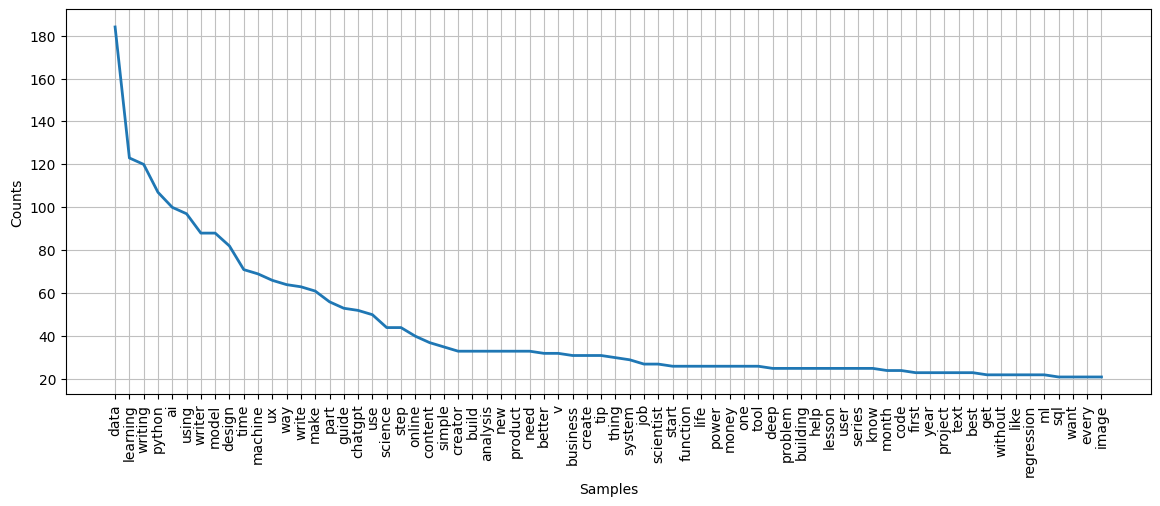

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

#collect list count
word_freq = nltk.FreqDist(after_steming)

#output
# print(word_freq.most_common())
plt.figure(figsize=(14,5))
word_freq.plot(70,cumulative=False)


Text(0, 0.5, 'Frekuensi')

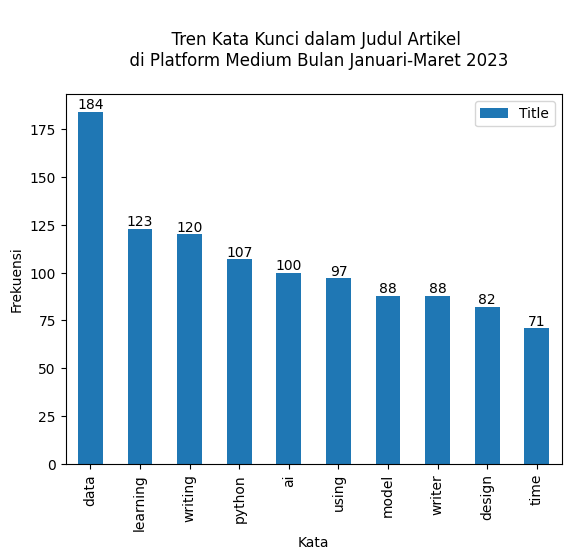

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#convert frequence to Dataframe
freg_word = pd.DataFrame.from_dict(word_freq,orient='index')
freg_word.columns = ['Title']
freg_word.index.name = 'Kata'

freg_word = freg_word.sort_values(by =['Title'], ascending=False)

#visualization & Output
ax = freg_word.head(10).plot.bar()
ax.bar_label(ax.containers[0]) #anotate bar
plt.title('''
  Tren Kata Kunci dalam Judul Artikel 
  di Platform Medium Bulan Januari-Maret 2023
  ''')
plt.ylabel('Frekuensi')

Popular Articel

In [16]:
#Readingtime view
df3=df[['date','publication','title','reading_time','responses','claps']]

readingtime_view =df3.sort_values(by =['reading_time'], ascending=False)
readingtime_view.head()

,date,publication,title,reading_time,responses,claps
1177,2023-02-13,Towards Data Science,Learning from Machine Learning | Maarten Groot...,43,1,106
1098,2023-02-22,Towards Data Science,Image Registration for Medical Datasets,31,1,20
1479,2023-01-13,Towards Data Science,"Specialized LLMs: ChatGPT, LaMDA, Galactica, C...",30,2,81
234,2023-02-16,Towards Data Science,Reinforcement Learning Basics: Understanding S...,28,2,129
799,2023-03-14,Towards Data Science,"Build a back-end with PostgreSQL, FastAPI, and...",28,1,28


In [17]:
#claps view
claps_view =df3.sort_values(by =['claps'], ascending=False)
claps_view.head(5)

,date,publication,title,reading_time,responses,claps
1167,2023-02-04,The Startup,How I Write 2 Articles Most Mornings Before Wo...,4,207,11100
418,2023-01-30,Towards Data Science,How ChatGPT Works: The Model Behind The Bot,8,130,7100
338,2023-03-19,The Startup,I Got Fired From My 9–5 For Having a Medium Ac...,4,123,6800
898,2023-03-03,The Writing Cooperative,"How I Write 480,000 Words a Month and Never Ru...",6,102,6300
713,2023-01-15,The Writing Cooperative,What Makes Me Skip Your Story,7,92,5400


In [18]:
#date view
date_upload=df3.sort_values(by =['date'], ascending=True)
date_upload

,date,publication,title,reading_time,responses,claps
838,2023-01-01,The Writing Cooperative,How Writing Is Like Baking Bread,6,1,228
840,2023-01-01,The Writing Cooperative,4 Ways In Which Returning To Writing After Bre...,5,1,224
839,2023-01-01,The Writing Cooperative,When The Writers You Don’t Admire Get You Down,7,1,151
837,2023-01-01,The Writing Cooperative,Ocean’s Eleven Remake Is a Masterclass on Stor...,9,0,191
836,2023-01-01,The Startup,5 Underrated Tips Nobody Talks About Content C...,4,9,435
...,...,...,...,...,...,...
41,2023-03-30,The Startup,"4 Months Ago, I Quit My Job to Start My Own Bu...",7,0,11
42,2023-03-30,The Writing Cooperative,Selling Your Self-Published Novel is All About...,7,0,22
43,2023-03-30,The Writing Cooperative,How to Write Better Character Description,5,2,57
39,2023-03-30,The Startup,How I Built Online Income Streams Alongside My...,4,8,475


Perbandingan Intensitas Upload Artikel untuk Setiap Penerbit

In [19]:
date_upload['publication'].unique()

array(['The Writing Cooperative', 'The Startup', 'Towards Data Science',
       'UX Collective'], dtype=object)

In [20]:
#Article Upload Corp 1
corp_1 = date_upload[date_upload['publication']=='The Writing Cooperative'].copy()
corp_1['article_count_corp_1'] = 1
corp_1 = corp_1[['date','article_count_corp_1']]

#Data Upload record
record_upload_corp_1 = corp_1.groupby(['date']).count()
c1 = record_upload_corp_1

#output test
# corp_1.head(2)
# c1

In [21]:
#Article Upload Corp 2
corp_2 = date_upload[date_upload['publication']=='The Startup'].copy()
corp_2['article_count_corp_2'] = 1
corp_2 = corp_2[['date','article_count_corp_2']]
record_upload_corp_2 = corp_2.groupby(['date']).count()
c2 = record_upload_corp_2

In [22]:
#Article Upload Corp 3
corp_3 = date_upload[date_upload['publication']=='Towards Data Science'].copy()
corp_3['article_count_corp_3'] = 1
corp_3 = corp_3[['date','article_count_corp_3']]
record_upload_corp_3 = corp_3.groupby(['date']).count()
c3 = record_upload_corp_3

In [23]:
#Article Upload Corp 4
corp_4 = date_upload[date_upload['publication']=='UX Collective'].copy()
corp_4['article_count_corp_4'] = 1
corp_4 = corp_4[['date','article_count_corp_4']]
record_upload_corp_4 = corp_4.groupby(['date']).count()
c4 = record_upload_corp_4

In [24]:
#Join c1,c2,c3,c4 
join_c1c2 = c1.set_index(c1.index).join(c2.set_index(c2.index),how='outer')
join_c3c4 = c3.set_index(c3.index).join(c4.set_index(c4.index),how='outer')

freg_upload = join_c1c2.set_index(join_c1c2.index).join(join_c3c4.set_index(join_c3c4.index), how = 'outer')

#output test
# join_c1c2.head(2)
# join_c3c4.head(2)
freg_upload.head()

,article_count_corp_1,article_count_corp_2,article_count_corp_3,article_count_corp_4
date,,,,
2023-01-01,4,5,6.0,NaN
2023-01-02,4,5,13.0,7.0
2023-01-03,4,7,19.0,4.0
2023-01-04,5,6,26.0,3.0
2023-01-06,4,6,25.0,3.0


In [25]:
#data cleaning
freg_upload.fillna(0,inplace=True)
freg_upload['article_count_corp_3'] = freg_upload['article_count_corp_3'].astype('int')
freg_upload['article_count_corp_4'] = freg_upload['article_count_corp_4'].astype('int')
freg_upload

,article_count_corp_1,article_count_corp_2,article_count_corp_3,article_count_corp_4
date,,,,
2023-01-01,4,5,6,0
2023-01-02,4,5,13,7
2023-01-03,4,7,19,4
2023-01-04,5,6,26,3
2023-01-06,4,6,25,3
...,...,...,...,...
2023-03-25,3,3,0,6
2023-03-27,5,6,23,6
2023-03-28,4,6,9,4


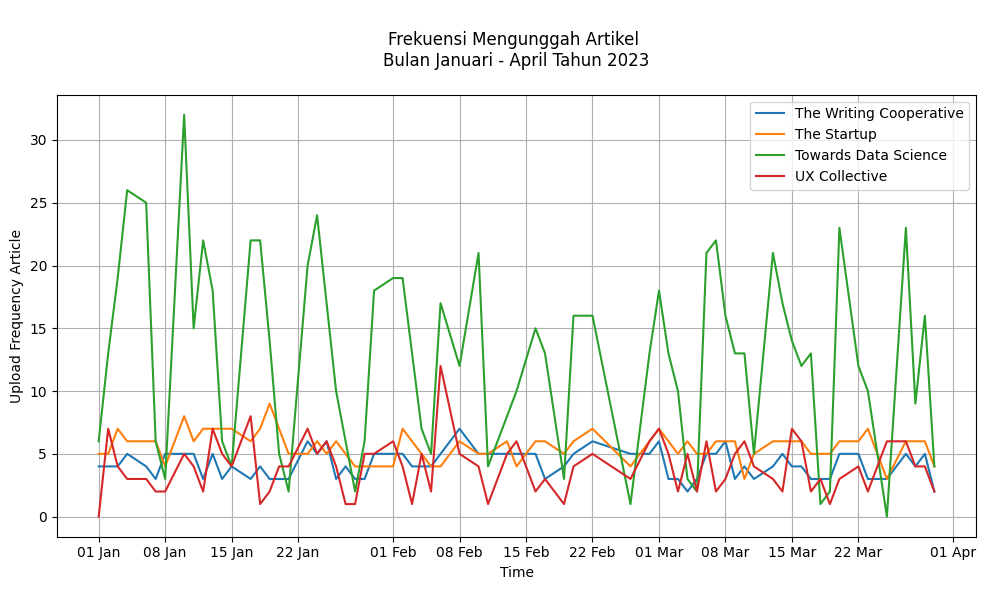

In [26]:
import matplotlib.dates as mdates

time = freg_upload.index
pub_1 = freg_upload['article_count_corp_1']
pub_2 = freg_upload['article_count_corp_2']
pub_3 = freg_upload['article_count_corp_3']
pub_4 = freg_upload['article_count_corp_4']

locator = mdates.DayLocator(bymonthday=[1, 8, 15, 22])
formatter = mdates.DateFormatter('%d %b')

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=0)
#set data
ax.plot(time, pub_1)
ax.plot(time, pub_2)
ax.plot(time, pub_3)
ax.plot(time, pub_4)

ax.grid(True)
ax.set_xlabel('Time')
ax.set_ylabel('Upload Frequency Article')
ax.legend(['The Writing Cooperative','The Startup','Towards Data Science','UX Collective'])
ax.set_title('''
Frekuensi Mengunggah Artikel 
Bulan Januari - April Tahun 2023
''')
plt.show()

Perbandingan antara readingtime, responses, dan claps

Text(0.5, 1.0, '\nPerbandingan Lama Waktu Baca Artikel Medium Tahun 2023 \n')

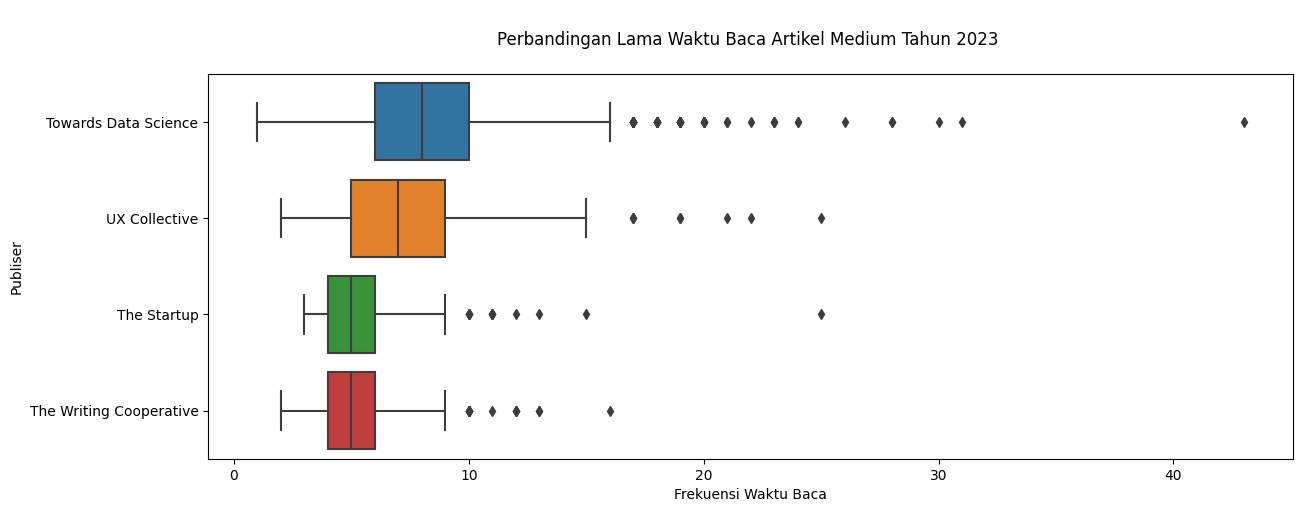

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

only_data = df[['publication','reading_time','responses','claps']]

#output
only_data

#visualisation
plt.figure(figsize=(14,5))
sns.boxplot(data=only_data, y='publication', x='reading_time')
plt.xlabel('Frekuensi Waktu Baca')
plt.ylabel('Publiser')
plt.title('''
Perbandingan Lama Waktu Baca Artikel Medium Tahun 2023 
''')

Text(0.5, 1.0, '\nPerbandingan Jumlah Komentar Artikel Medium Tahun 2023 \n')

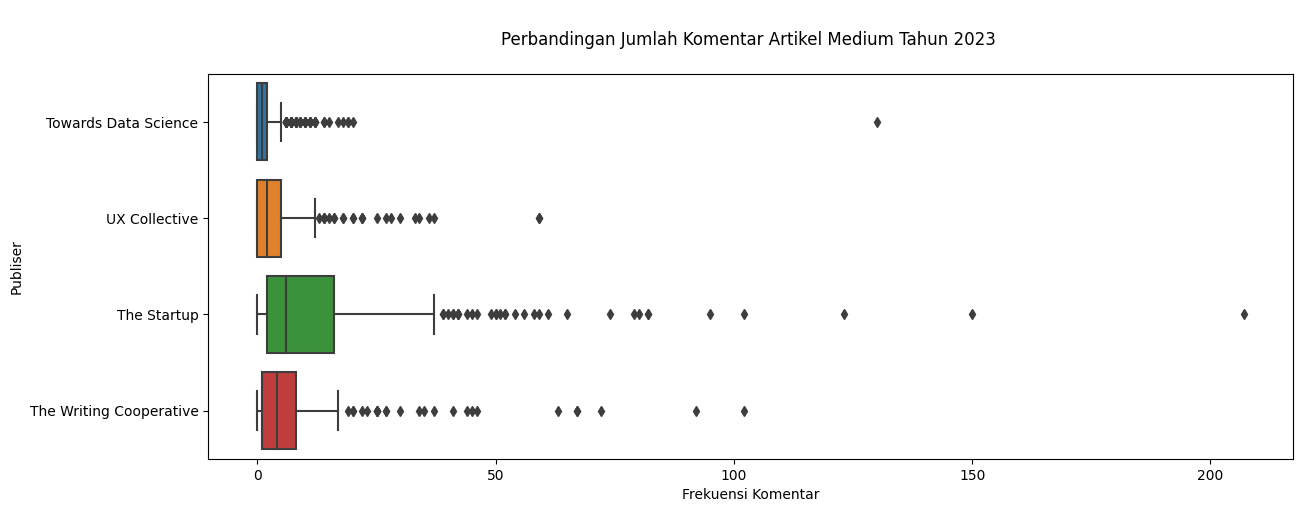

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

only_data = df[['publication','reading_time','responses','claps']]

#output
only_data

#visualisation
plt.figure(figsize=(14,5))
sns.boxplot(data=only_data, y='publication', x='responses')
plt.xlabel('Frekuensi Komentar')
plt.ylabel('Publiser')
plt.title('''
Perbandingan Jumlah Komentar Artikel Medium Tahun 2023 
''')

Text(0.5, 1.0, '\nPerbandingan Jumlah Tepuk Tangan Artikel Medium Tahun 2023 \n')

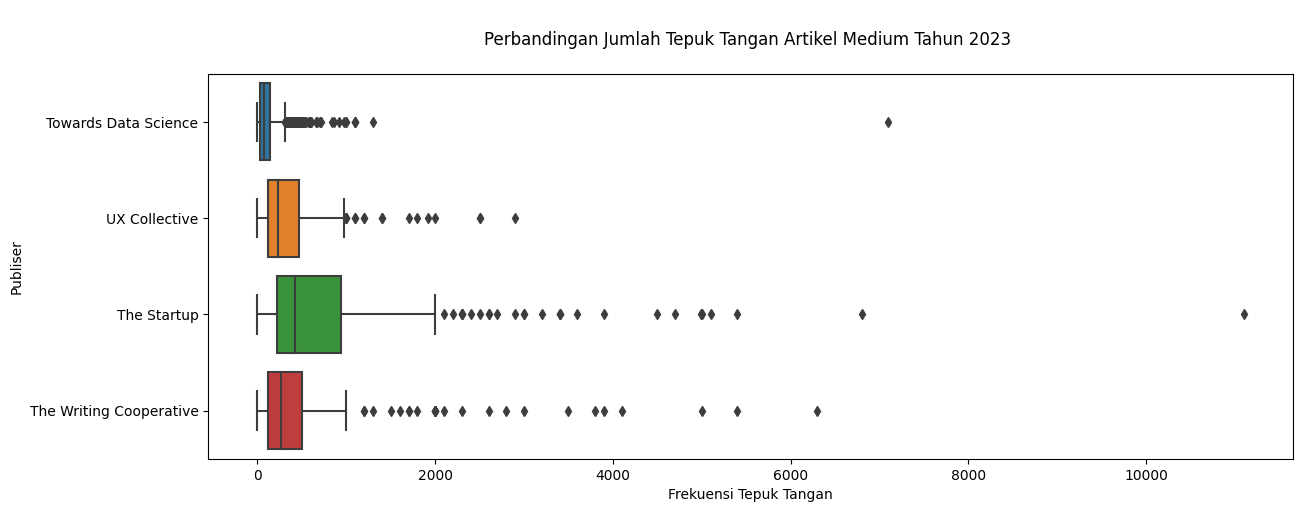

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

only_data = df[['publication','reading_time','responses','claps']]

#output
only_data

#visualisation
plt.figure(figsize=(14,5))
sns.boxplot(data=only_data, y='publication', x='claps')
plt.xlabel('Frekuensi Tepuk Tangan')
plt.ylabel('Publiser')
plt.title('''
Perbandingan Jumlah Tepuk Tangan Artikel Medium Tahun 2023 
''')

                         title  subtitle
publication                             
The Startup                393       393
The Writing Cooperative    293       293
Towards Data Science       888       888
UX Collective              278       278


Text(0.5, 1.0, '\nFrekuensi Upload Artikel Tahun 2023 \n')

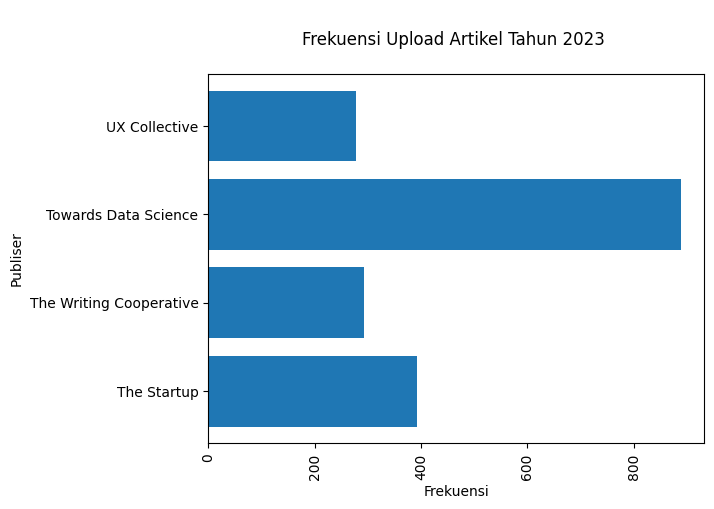

In [30]:
import matplotlib.pyplot as plt

article_count = df[['publication','title','subtitle']]

publiser = article_count.groupby(['publication']).count()

#output
print(publiser)
plt.barh(publiser.index,publiser['title'])
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Frekuensi')
plt.ylabel('Publiser')
plt.title('''
Frekuensi Upload Artikel Tahun 2023 
''')